<a href="https://colab.research.google.com/github/sahithi-gprec/ML-DEC/blob/main/mobileprice_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
test_data.drop('id',axis=1,inplace=True)

In [ ]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
test_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [ ]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

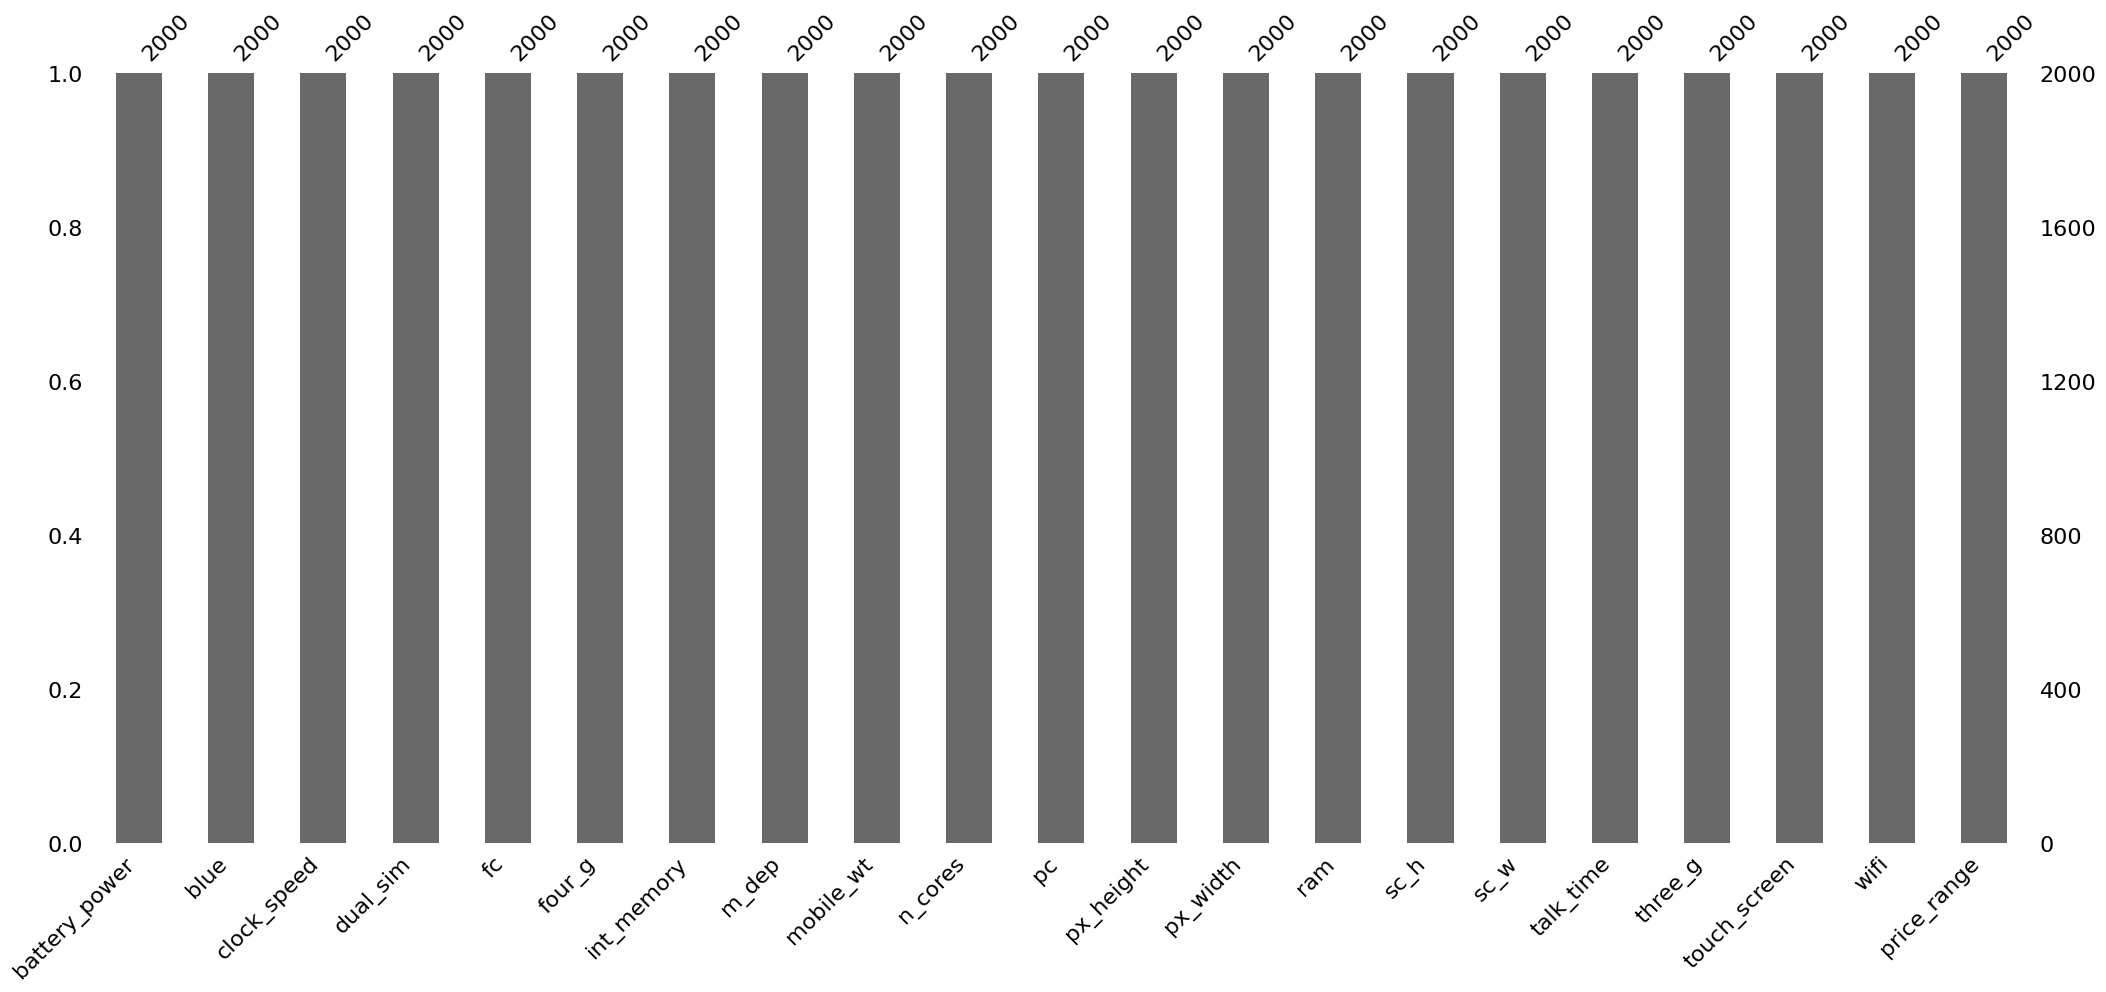

In [ ]:
import missingno as msno
msno.bar(train_data)
plt.show()

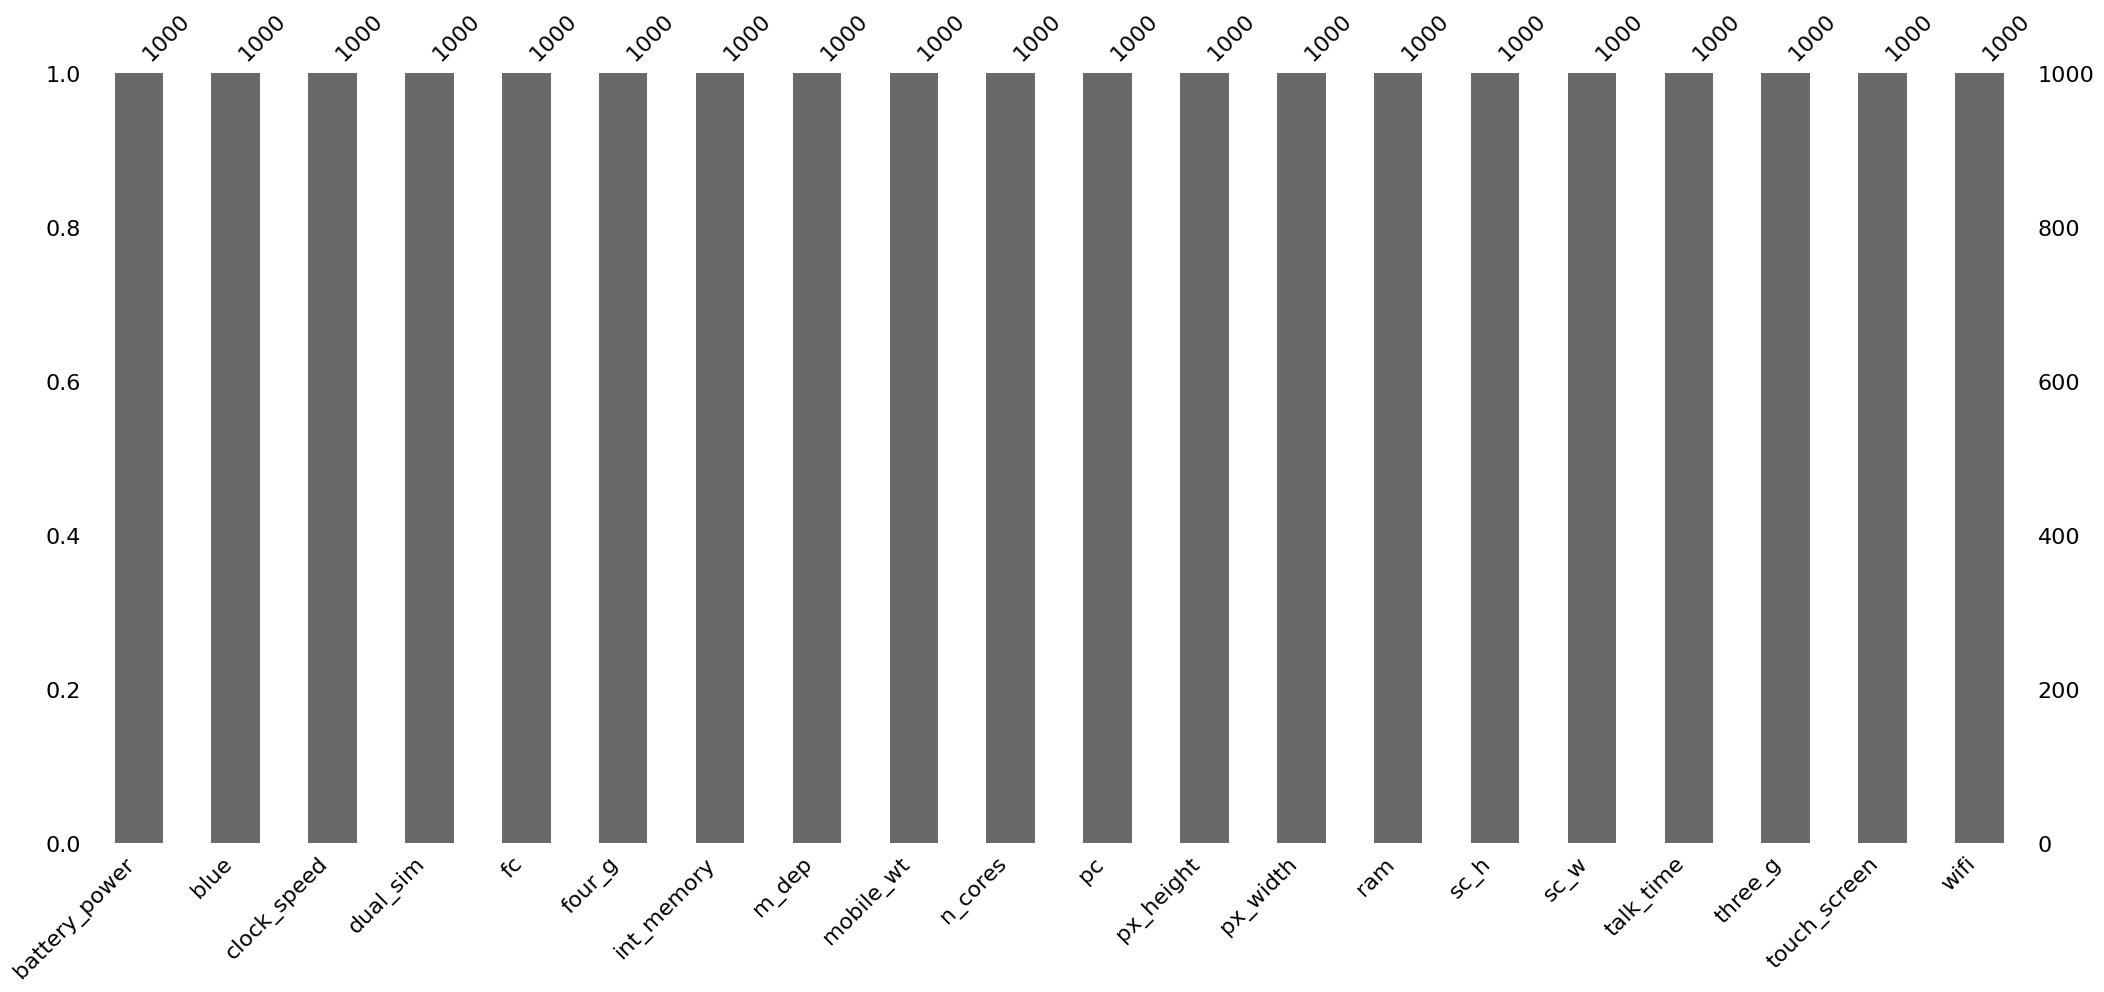

In [ ]:
import missingno as msno
msno.bar(test_data)
plt.show()

In [ ]:
train_data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


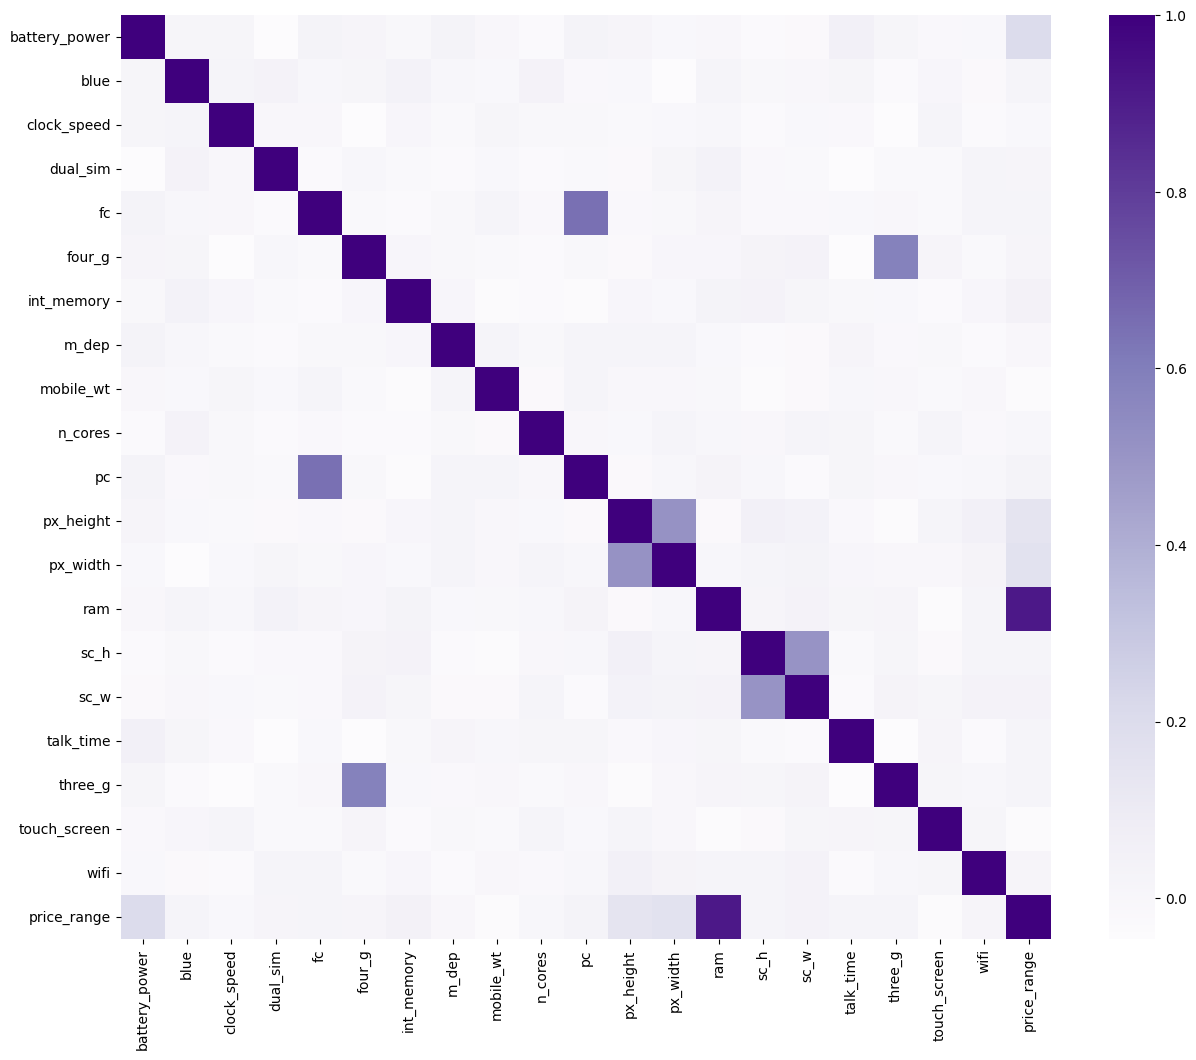

In [ ]:
corr=train_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')

In [ ]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
train_data=train_data[['price_range','ram','battery_power','px_width','px_height','int_memory']]
train_data.head()

,price_range,ram,battery_power,px_width,px_height,int_memory
0,1,2549,842,756,20,7
1,2,2631,1021,1988,905,53
2,2,2603,563,1716,1263,41
3,2,2769,615,1786,1216,10
4,1,1411,1821,1212,1208,44


In [ ]:
test_data=test_data[['ram','battery_power','px_width','px_height','int_memory']]
test_data.head()

,ram,battery_power,px_width,px_height,int_memory
0,3476,1043,1412,226,5
1,3895,841,857,746,61
2,2396,1807,1366,1270,27
3,3893,1546,1752,295,25
4,1773,1434,810,749,49


<Axes: xlabel='price_range', ylabel='ram'>

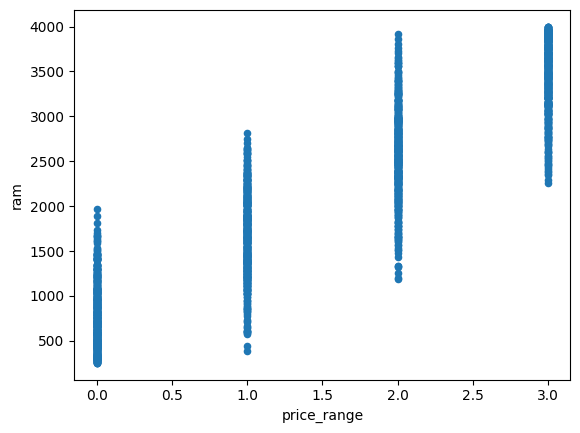

In [ ]:
train_data.plot(x='price_range',y='ram',kind='scatter')

<Axes: xlabel='price_range', ylabel='battery_power'>

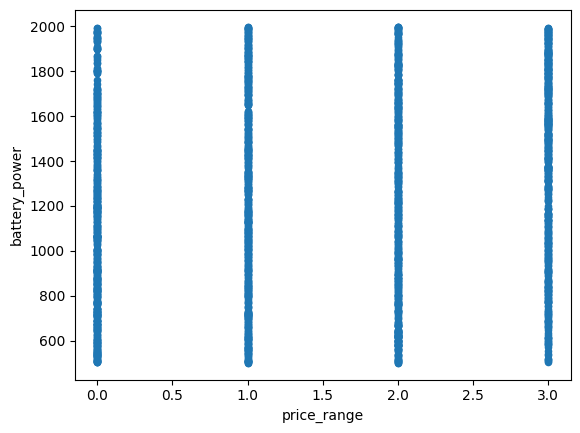

In [ ]:
train_data.plot(x='price_range',y='battery_power',kind='scatter')

<Axes: xlabel='price_range', ylabel='px_width'>

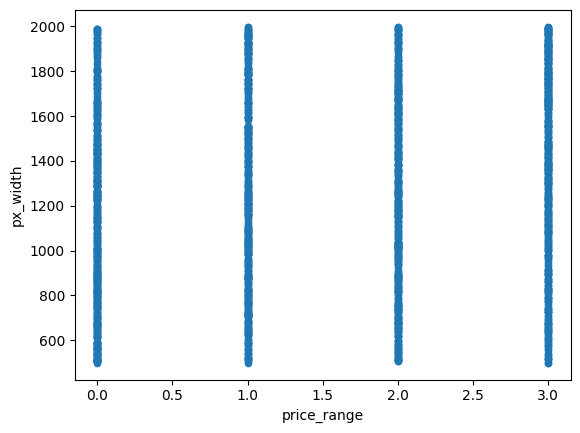

In [ ]:
train_data.plot(x='price_range',y='px_width',kind='scatter')

<Axes: xlabel='price_range', ylabel='px_height'>

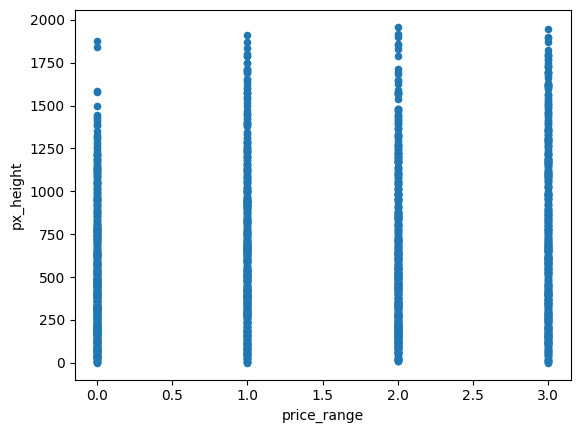

In [ ]:
train_data.plot(x='price_range',y='px_height',kind='scatter')

<Axes: xlabel='price_range', ylabel='int_memory'>

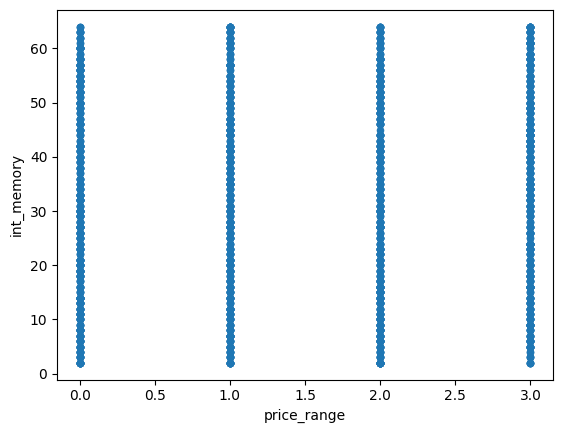

In [ ]:
train_data.plot(x='price_range',y='int_memory',kind='scatter')

<Axes: >

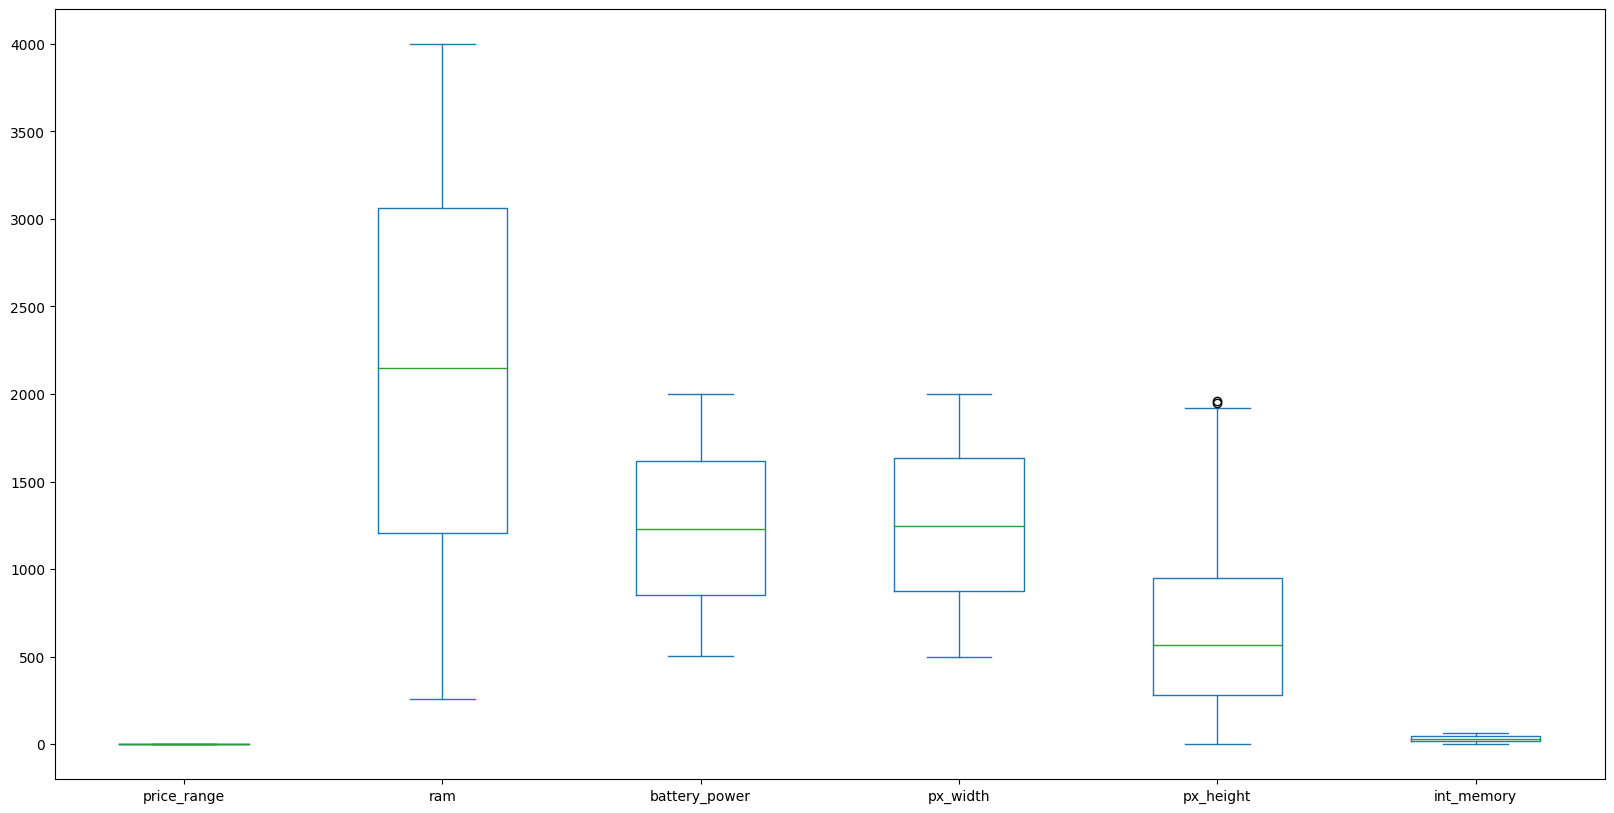

In [ ]:
train_data.plot(kind='box',figsize=(20,10))

In [ ]:
X=train_data[['ram','battery_power','px_width','px_height','int_memory']]
y=train_data[['price_range']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
data_test_std=scaler.transform(test_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.4,random_state=0)

**DESICION TREE CLASSIFIER**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
predicted_values=dt.predict(X_test)
predicted_values

array([3, 0, 1, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 3, 2, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 0, 0, 3, 3, 3, 0, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 0, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 2, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_values)

0.85375

In [ ]:
test_predicted=dt.predict(data_test_std)
test_predicted

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 1, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 1, 0, 3, 3, 3, 2, 0, 2,
       1, 1, 2, 1, 2, 0, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 2, 1, 0, 0, 1, 1, 3, 2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 1, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

**KNN CLASSIFIER**





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
predicted=knn.predict(X_test)
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 1, 0, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 1, 3, 0, 2, 2, 2, 0, 2, 2, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 3, 1, 0, 3, 2, 3, 0, 3, 2, 1, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 0, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3, 1, 0, 3, 1, 2, 2, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 2, 2, 3, 3, 3, 1, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 0, 1, 0, 2, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 3, 2, 1, 1, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [ ]:
accuracy_score(predicted,y_test)

0.835

In [ ]:
knn.predict(data_test_std)

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 1, 0, 3,
       2, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 0, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 2, 1, 3, 3, 2, 0, 2, 0, 1,
       1, 3, 0, 1, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 2, 1, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 0, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 1,
       3, 3, 1, 1, 2, 3, 3, 1, 2, 0, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       1, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 3, 1, 0, 0, 2, 2, 1, 1, 3, 2, 1, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1,

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)
rfc_predicted=knn.predict(X_test)
rfc_predicted

<ipython-input-236-c933901af365>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 1, 0, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 1, 3, 0, 2, 2, 2, 0, 2, 2, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 3, 1, 0, 3, 2, 3, 0, 3, 2, 1, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 0, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3, 1, 0, 3, 1, 2, 2, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 2, 2, 3, 3, 3, 1, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 0, 1, 0, 2, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 3, 2, 1, 1, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [ ]:
accuracy_score(rfc_predicted,y_test)

0.835

In [ ]:
rfc.predict(data_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 1, 2, 1, 0, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

**SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)
svc_predicted=knn.predict(X_test)
svc_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 0, 2, 2, 2, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 1, 0, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 1, 3, 0, 2, 2, 2, 0, 2, 2, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 3, 1, 0, 3, 2, 3, 0, 3, 2, 1, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 1, 0, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3, 1, 0, 3, 1, 2, 2, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 2, 2, 3, 3, 3, 1, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 0, 1, 0, 2, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 3, 2, 1, 1, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [ ]:
accuracy_score(y_test,svc_predicted)

0.835

In [ ]:
svc.predict(data_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 0, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

**XGBOOST CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)
xgb_predicted=xgb.predict(X_test)
xgb_predicted

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 0, 3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 0,

In [ ]:
accuracy_score(y_test,xgb_predicted)

0.90875

In [ ]:
xgb.predict(data_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,